<a href="https://colab.research.google.com/github/alexandre858/DataMinig/blob/main/Projet_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import os,sys
from PIL import Image
import json
import pathlib
import pandas
from PIL import Image
import matplotlib.pyplot as plot



try:
   os.mkdir('data')
except:
    pass


donnees={}


 
path = '.'
 
files = os.listdir(path+"/test")

i=1
for name in files:
  if os.path.isfile("test/"+name):
    i=i+1
    imgfile = Image.open("test/"+name)
    #format de l'image


    histogram = imgfile.histogram()

    red = histogram[0:255]
    green = histogram[256:511]
    blue = histogram[512:767]
    print (histogram)
    print (len(red),len(green),len (blue),name)
    donnees[i-1]={"name":name,"size_high":imgfile.size[0],"size_lenght":imgfile.size[1],"format":imgfile.format}



with open("data/data.json", "w") as file:
    json.dump(donnees, file,indent = 3)


#dataframe = pd.DataFrame(array,
#      columns=['year', 'languageLabel', 'paradigmLabel']) 
#dataframe = dataframe.astype(dtype= {"year" : "int64",
#      "languageLabel" : "<U200", "paradigmLabel" : "<U200"})

#grouped = dataframe.groupby(['year',
#       'paradigmLabel']).agg(['count'])
#print(grouped)





[12460, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 436, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 143, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 12, 188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 33, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 12460, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
#test taux de presence
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("./images/archeops.png")


histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

total_red=0
total_blue=0
total_green=0

i=0
while i <255:
  total_red=total_red+red[i]*i
  total_blue=total_blue+blue[i]*i
  total_green=total_green+green[i]*i
  i+=1


print(total_red,total_blue,total_green)





 

334382 511705 574290


[  674 11592  1776   358]
[[1.93311534e+02 2.27198573e+02 2.44951843e+02 2.54161118e+02]
 [1.14375347e-03 3.26786706e-03 5.06519395e-03 1.66661220e-03]
 [9.29098731e+01 1.44894601e+02 1.80487847e+02 2.49083459e+02]
 [1.81033473e+02 1.90267782e+02 1.97934100e+02 8.50177824e+01]]
[2]
[ 674 1776  358]


NameError: ignored

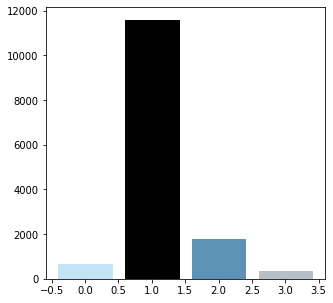

In [171]:
#test kmeans

from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("images/articuno.png")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=1, ncols=1, figsize=(5,5))
xaxis = 0
yaxis = 0

cluster_count = 4

clusters = MiniBatchKMeans(n_clusters = 4)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = axes.bar(labels, histogram[0])
print (histogram[0])
print(clusters.cluster_centers_)
for i in range(cluster_count):
    barlist[i].set_color('#%02x%02x%02x' % (
    math.ceil(clusters.cluster_centers_[i][0]),
        math.ceil(clusters.cluster_centers_[i][1]), 
    math.ceil(clusters.cluster_centers_[i][2])))
data=numpy.where(histogram[0]==max(histogram[0]))

array=numpy.delete(histogram[0],data[0])

data=numpy.where(histogram[0]==max(array))
print (data[0])
print (array)

#print (numpy.delete(histogram[0],numpy.where(histogram[0],max(histogram[0]))))
print("couleur dominante rgb :" ,math.ceil(clusters.cluster_centers_[index][0]),math.ceil(clusters.cluster_centers_[1][1]) ,math.ceil(clusters.cluster_centers_[1][2] ) )